(image_file_formats:aicsimagio=)
# Dateien mit AICSImageIO lesen

Die [AICSImageIO-Bibliothek](https://github.com/AllenCellModeling/aicsimageio) zielt darauf ab, das Lesen von mikroskopischen Bilddaten zu vereinfachen. 

Um die Bibliothek zu installieren, müssen Sie diesen Befehl aufrufen. 

```
pip install aicsimageio
```

Falls bestimmte proprietäre Dateiformate gelesen werden sollen, muss zusätzliche Software installiert werden. [Überprüfen Sie die Dokumentation für Details](https://github.com/AllenCellModeling/aicsimageio#extra-format-installation). 

In [1]:
from aicsimageio import AICSImage

from skimage.io import imshow

Zunächst erstellen wir ein `AICSImage`-Objekt, um zu sehen, ob es unser Dateiformat versteht. Im folgenden Beispiel lesen wir eine [OME Tif](https://docs.openmicroscopy.org/ome-model/5.6.3/ome-tiff/) Datei, die zuvor mit ImageJ gespeichert wurde. 

Als Beispiel verwenden wir hier ein Bild, das von [Célia Baroux et al(Universität Zürich)](https://datadryad.org/stash/dataset/doi:10.5061/dryad.02v6wwq2c) geteilt und zu Demonstrationszwecken neu gespeichert wurde.

In [2]:
aics_image = AICSImage("../../data/EM_C_6_c0.ome.tif")
aics_image

Attempted file (C:/structure/code/BioImageAnalysisNotebooks/data/EM_C_6_c0.ome.tif) load with reader: aicsimageio.readers.bfio_reader.OmeTiledTiffReader failed with error: No module named 'bfio'
C:\Users\haase\mambaforge\envs\bio39\lib\site-packages\ome_types\_convenience.py:105: FutureWarning: The default XML parser will be changing from 'xmlschema' to 'lxml' in version 0.4.0.  To silence this warning, please provide the `parser` argument, specifying either 'lxml' (to opt into the new behavior), or'xmlschema' (to retain the old behavior).
  d = to_dict(os.fspath(xml), parser=parser, validate=validate)


<AICSImage [Reader: OmeTiffReader, Image-is-in-Memory: False]>

Dieses Objekt kann uns bereits grundlegende Informationen wie Bildgröße/Form, Dimensionen und Dimensionsnamen und -reihenfolge geben.

In [3]:
aics_image.shape

(1, 1, 256, 256, 256)

In [4]:
aics_image.dims

<Dimensions [T: 1, C: 1, Z: 256, Y: 256, X: 256]>

In [5]:
aics_image.dims.order

'TCZYX'

Aus diesem Objekt können wir auch Pixel als numpy-Arrays abrufen.

In [6]:
np_image = aics_image.get_image_data("ZYX", T=0)
np_image.shape

(256, 256, 256)

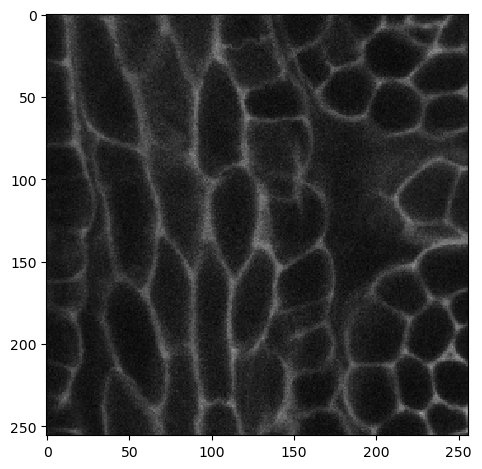

In [7]:
imshow(np_image[128])

## Metadaten lesen

Bei der Arbeit mit mikroskopischen Bilddaten ist es wichtig, sich der Metadaten bewusst zu sein, zum Beispiel der Voxelgröße. Um Volumenmessungen in korrekten physikalischen Einheiten durchzuführen, müssen wir wissen, wie groß ein Voxel in X, Y und Z ist.

In [8]:
aics_image.physical_pixel_sizes

PhysicalPixelSizes(Z=0.16784672897196262, Y=0.16776018346253663, X=0.16776018346253663)

Und man kann eine Hilfsfunktion definieren, um die Voxelgröße im Z/Y/X-Format zu lesen.

In [9]:
def get_voxel_size_from_aics_image(aics_image):
    return (aics_image.physical_pixel_sizes.Z,
            aics_image.physical_pixel_sizes.Y,
            aics_image.physical_pixel_sizes.X)

In [10]:
get_voxel_size_from_aics_image(aics_image)

(0.16784672897196262, 0.16776018346253663, 0.16776018346253663)

## CZI-Dateien lesen

Falls zusätzlich die [`aicspylibczi` Bibliothek](https://pypi.org/project/aicspylibczi/) installiert ist, kann man auch CZI-Dateien mit AICSImageIO öffnen.

In [11]:
czi_image = AICSImage("../../data/PupalWing.czi")
czi_image.shape

(1, 1, 80, 520, 692)

In [12]:
np_czi_image = czi_image.get_image_data("ZYX", T=0)
np_czi_image.shape

(80, 520, 692)

In [13]:
get_voxel_size_from_aics_image(czi_image)

(1.0, 0.20476190476190476, 0.20476190476190476)

## LIF-Dateien lesen

Falls zusätzlich die [`readlif` Bibliothek](https://pypi.org/project/readlif/) installiert ist, kann man auch LIF-Bilder mit AICSImageIO lesen.

In [14]:
lif_image = AICSImage("../../data/y293-Gal4_vmat-GFP-f01.lif")
lif_image.shape

(1, 2, 86, 500, 616)

In [15]:
np_lif_image = lif_image.get_image_data("ZYX", T=0)
np_lif_image.shape

(86, 500, 616)

In [16]:
get_voxel_size_from_aics_image(lif_image)

(1.0070810588235295, 0.46827875751503006, 0.46827869918699183)